## HHA550_Diabetes Prediction Dataset



## Healthcare-dataset-diabetes-data
Objective: Predict the likelihood of 30-day readmissions in the diabetic population in order to reduce the 30-day readmission rate for this population.

## Data Dictionary

Attribute Information

    1) race: 0 represents African American, 1 represents Asian, 2 represents Caucasian, 3 represents Hispanic, 4 represents other, 5 represents unknown race
    2) gender: 1 if Female, 2 if Male
    3) age: 1 = [0-10), 2 = [10-20), 3 = [20-30), 4 = [30-40), 5 = [40-50), 6 = [50-60), 7 = [60-70), 8 = [70-80), 9 = [80-90), 10 = [90-100)
    4) Time in hospital: Number of days between admission and discharge
    5) Number of procedures: Number of procedures (other than lab tests) performed during the encounter
    6) Glucose serum test result: Indicates the range of the result or if the test was not taken. 0 = “none” 1 = “normal’ 2 = “>200” 3 = “>300”
    7) Diabetes medications: 0 = “No” 1 = “Yes” if there was any diabetic medication prescribed.
    8) 24 features for medications: 0 = “No” if the drug was not prescribed. 1 = “steady” if the dosage did not change 2 = “down” if the dosage was decreased 3 = “up” if the dosage was increased during the encounter
    9) Readmitted: 0 = “No” for no record of readmission. 1 = “<30” if the patient was readmitted in less than 30 days 2 = “>30” if the patient was readmitted in more than 30 days


## Importing Packages

In [1]:
!pip install pyforest
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from lightgbm import LGBMClassifier 
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import missingno as msno
import re    

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,\
                            precision_score, recall_score, roc_auc_score,\
                            plot_confusion_matrix, classification_report, plot_roc_curve, f1_score

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=a2c3a9563b63fc3c57400fd07aaf17bfb08c9932aad986f0ee53517df886f57f
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


## Loading the CSV Data
Data has been cleaned in the csv, changes documented in data dictionary

In [2]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/cindym02/DiabeticData/main/diabetic_data_cleaned.csv')

## PREPROCESSING

In [3]:
diabetes.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmittedyn
0,2,1,1,6,25,1,1,41,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,2,1,1,7,3,59,0,18,...,2,0,0,0,0,0,1,1,2,1
2,0,1,3,1,1,7,2,11,5,13,...,0,0,0,0,0,0,0,1,0,0
3,2,2,4,1,1,7,2,44,1,16,...,2,0,0,0,0,0,1,1,0,0
4,2,2,5,1,1,7,1,51,0,8,...,1,0,0,0,0,0,1,1,0,0


### Check for Missing Data / Missing Values

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   race                      101766 non-null  int64
 1   gender                    101766 non-null  int64
 2   age                       101766 non-null  int64
 3   admission_type_id         101766 non-null  int64
 4   discharge_disposition_id  101766 non-null  int64
 5   admission_source_id       101766 non-null  int64
 6   time_in_hospital          101766 non-null  int64
 7   num_lab_procedures        101766 non-null  int64
 8   num_procedures            101766 non-null  int64
 9   num_medications           101766 non-null  int64
 10  number_outpatient         101766 non-null  int64
 11  number_emergency          101766 non-null  int64
 12  number_inpatient          101766 non-null  int64
 13  number_diagnoses          101766 non-null  int64
 14  max_glu_serum       

In [5]:
# Check for null values
diabetes.isna().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-metformin         0
glipizide-

In [6]:
def missing (diabetes):
    missing_number = diabetes.isnull().sum().sort_values(ascending=False)
    missing_percent = (diabetes.isnull().sum()/diabetes.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(diabetes)

,Missing_Number,Missing_Percent
race,0,0.0
acetohexamide,0,0.0
glyburide,0,0.0
tolbutamide,0,0.0
pioglitazone,0,0.0
rosiglitazone,0,0.0
acarbose,0,0.0
miglitol,0,0.0
troglitazone,0,0.0
tolazamide,0,0.0


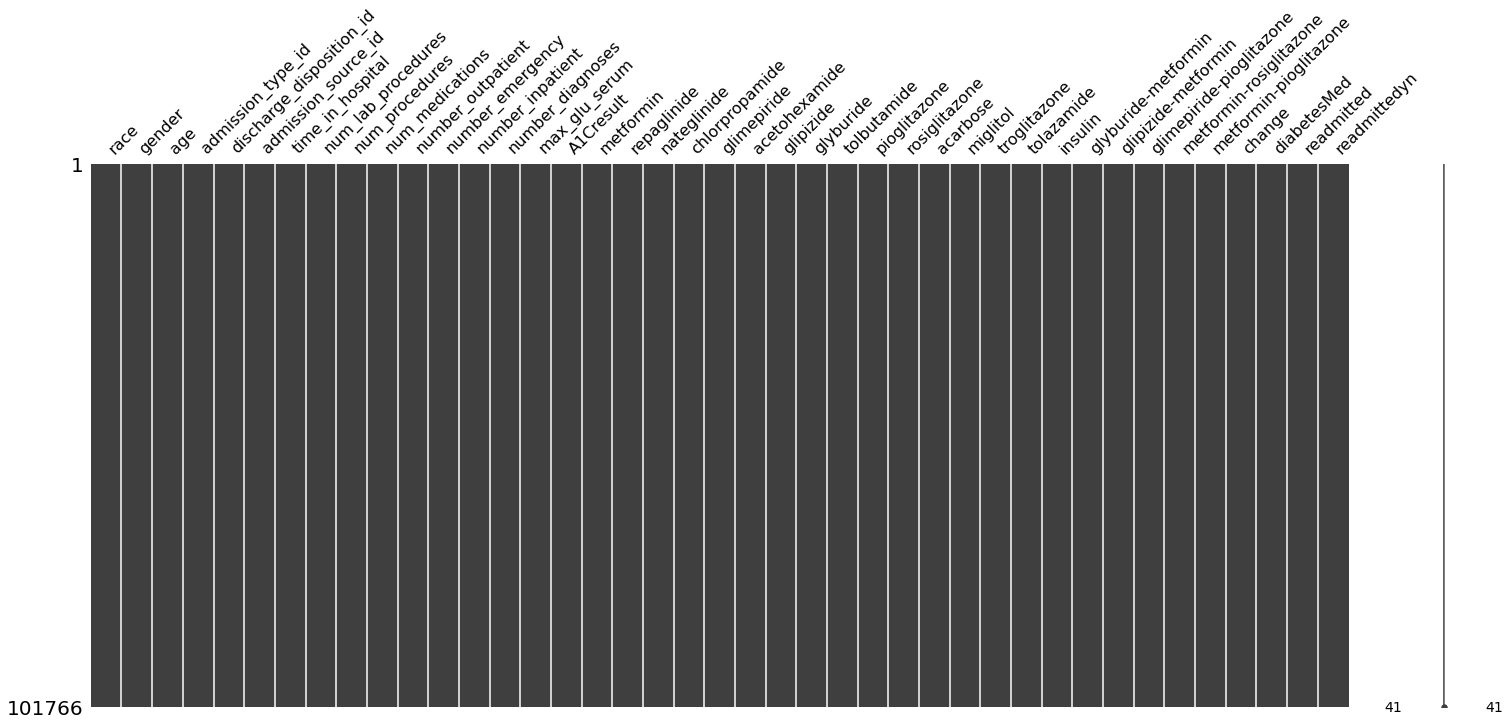

In [7]:
msno.matrix(diabetes)

#Exploratory Data Analysis (EDA)

## Visualize readmission rates

In [8]:
y = diabetes['readmitted']
print(f'Percentage of diabetic patients who were readmitted in less than 30 days: % {round(y.value_counts(normalize=True)[1]*100,2)} ({y.value_counts()[1]} patients)\nPercentage of diabetic patients who were readmitted after 30 days: % {round(y.value_counts(normalize=True)[2]*100,2)} ({y.value_counts()[2]} patients)\nPercentage of diabetic patients who were not readmitted: % {round(y.value_counts(normalize=True)[0]*100,2)} ({y.value_counts()[0]} patients)')

Percentage of diabetic patients who were readmitted in less than 30 days: % 11.16 (11357 patients)
Percentage of diabetic patients who were readmitted after 30 days: % 34.93 (35545 patients)
Percentage of diabetic patients who were not readmitted: % 53.91 (54864 patients)


In [9]:
fig = px.histogram(diabetes, x="readmitted", title='Diabetes Readmission Rates', width=400, height=400)
fig.show()

Data Imbalance: No diabetes readmission is majority class

In [10]:
numerical = ['age','time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'readmitted' ]

In [11]:
diabetes[numerical].describe()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,readmitted
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,7.096702,4.395987,43.095641,1.339730,16.021844,0.635566,7.422607,0.091966,0.366154,0.810163
std,1.594084,2.985108,19.674362,1.705807,8.127566,1.262863,1.933600,0.432688,0.889615,0.923239
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,31.000000,0.000000,10.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,8.000000,0.000000,0.000000,0.000000
75%,8.000000,6.000000,57.000000,2.000000,20.000000,1.000000,9.000000,0.000000,0.000000,2.000000
max,10.000000,14.000000,132.000000,6.000000,81.000000,21.000000,16.000000,3.000000,3.000000,2.000000


In [12]:
diabetes[numerical].skew()

age                  -0.630539
time_in_hospital      1.133999
num_lab_procedures   -0.236544
num_procedures        1.316415
num_medications       1.326672
number_inpatient      3.614139
number_diagnoses     -0.876746
max_glu_serum         5.248889
A1Cresult             2.286971
readmitted            0.384328
dtype: float64

### Univariate Analysis

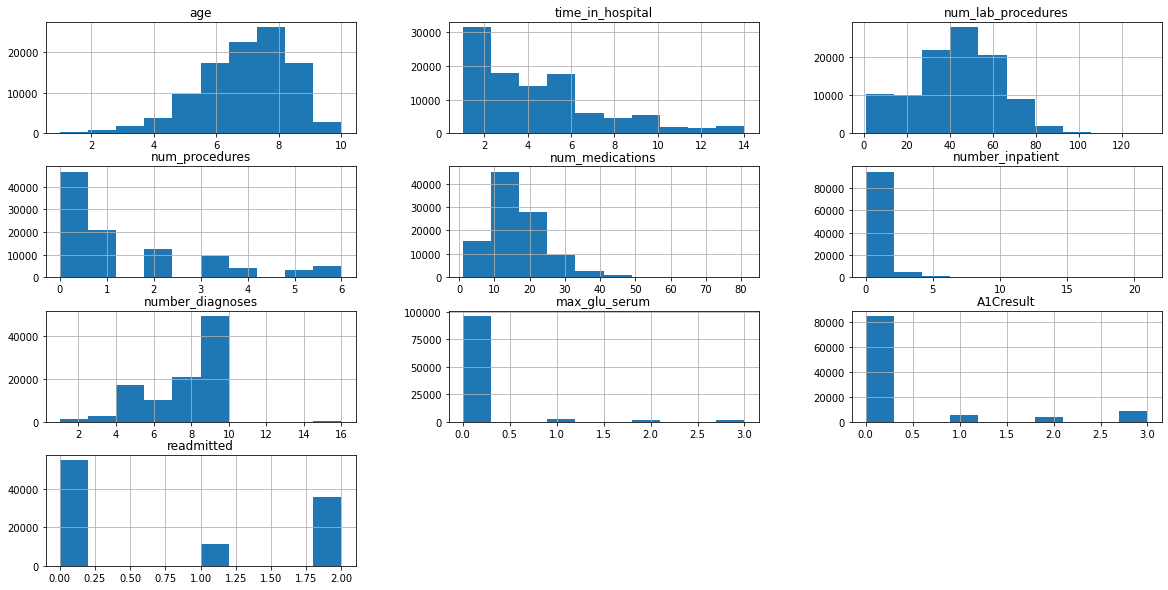

In [13]:
diabetes[numerical].hist(figsize=(20,10));

### Converting Categorical Features into Numeric Features

Categorical Features: Race, Gender, Diabetes Medication

In [14]:
diabetes = pd.get_dummies(diabetes, drop_first = False)

In [15]:
print (f'{round(diabetes["gender"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="gender", title='Gender', width=500, height=500)
fig.show()

1    53.76
2    46.24
3     0.00
Name: gender, dtype: float64


Gender counts 
* 54.7k Females
* 47k Males

In [16]:
print (f'{round(diabetes["race"].value_counts(normalize=True)*100,3)}')
fig = px.histogram(diabetes, x="race", title='Race', width=500, height=500)
fig.show()

2    74.778
0    18.877
5     2.234
3     2.002
4     1.480
1     0.630
Name: race, dtype: float64


Race counts

*   19210 African Americans
*   641 Asians
*   76099 Caucasians
*   2037 Hispanics
*   1506 Other



In [17]:
print (f'{round(diabetes["diabetesMed"].value_counts(normalize=True)*100,3)}')
fig = px.histogram(diabetes, x="diabetesMed", title='Diabetes Med Prescription', width=400, height=400)
fig.show()

1    77.003
0    22.997
Name: diabetesMed, dtype: float64



*   78363 patients are prescribed diabetic medication.
*   23403 patients are not prescribed diabetic medication.

# Bivariate Analysis

In [18]:
# Gender and Readmitted relationship
fig = px.histogram(diabetes, x="gender", color="readmitted",width=600, height=400)
fig.show()

In [19]:
# Race and Readmitted relationship
fig = px.histogram(diabetes, x="race", color="readmitted",width=600, height=400)
fig.show()

In [20]:
# Diabetes Medication and Readmitted relationship
fig = px.histogram(diabetes, x="diabetesMed", color="readmitted",width=600, height=400)
fig.show()

###Correlation Matrix & Scatter Plots

In [21]:
diabetes[numerical].corr()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,readmitted
age,1.000000,0.107515,0.020770,-0.030104,0.041847,-0.042861,0.242597,0.020515,-0.146009,0.026816
time_in_hospital,0.107515,1.000000,0.318450,0.191472,0.466135,0.073623,0.220186,0.028233,0.055889,0.040309
num_lab_procedures,0.020770,0.318450,1.000000,0.058066,0.268161,0.039231,0.152773,-0.128376,0.238170,0.035441
num_procedures,-0.030104,0.191472,0.058066,1.000000,0.385767,-0.066236,0.073734,-0.069278,-0.011760,-0.044150
num_medications,0.041847,0.466135,0.268161,0.385767,1.000000,0.064194,0.261526,-0.000605,0.014791,0.037399
number_inpatient,-0.042861,0.073623,0.039231,-0.066236,0.064194,1.000000,0.104710,0.031376,-0.054207,0.178208
number_diagnoses,0.242597,0.220186,0.152773,0.073734,0.261526,0.104710,1.000000,-0.042508,-0.032940,0.104660
max_glu_serum,0.020515,0.028233,-0.128376,-0.069278,-0.000605,0.031376,-0.042508,1.000000,-0.046330,0.015785
A1Cresult,-0.146009,0.055889,0.238170,-0.011760,0.014791,-0.054207,-0.032940,-0.046330,1.000000,-0.008414
readmitted,0.026816,0.040309,0.035441,-0.044150,0.037399,0.178208,0.104660,0.015785,-0.008414,1.000000


In [22]:
diabetes.groupby('readmitted')[numerical].mean()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,readmitted
readmitted,,,,,,,,,,
0,7.051892,4.254429,42.381598,1.410305,15.670367,0.381963,7.221366,0.084627,0.376914,0.0
1,7.176015,4.768249,44.226028,1.280884,16.903143,1.224003,7.692789,0.106366,0.324117,1.0
2,7.140526,4.495541,43.836601,1.249599,16.282768,0.838993,7.646898,0.098692,0.362977,2.0


In [23]:
#Correlation with the target variable
diabetes[['age','time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'readmittedyn']].corr()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,readmittedyn
age,1.000000,0.107515,0.020770,-0.030104,0.041847,-0.042861,0.242597,0.020515,-0.146009,0.030403
time_in_hospital,0.107515,1.000000,0.318450,0.191472,0.466135,0.073623,0.220186,0.028233,0.055889,0.051289
num_lab_procedures,0.020770,0.318450,1.000000,0.058066,0.268161,0.039231,0.152773,-0.128376,0.238170,0.039253
num_procedures,-0.030104,0.191472,0.058066,1.000000,0.385767,-0.066236,0.073734,-0.069278,-0.011760,-0.044748
num_medications,0.041847,0.466135,0.268161,0.385767,1.000000,0.064194,0.261526,-0.000605,0.014791,0.046772
number_inpatient,-0.042861,0.073623,0.039231,-0.066236,0.064194,1.000000,0.104710,0.031376,-0.054207,0.217194
number_diagnoses,0.242597,0.220186,0.152773,0.073734,0.261526,0.104710,1.000000,-0.042508,-0.032940,0.112564
max_glu_serum,0.020515,0.028233,-0.128376,-0.069278,-0.000605,0.031376,-0.042508,1.000000,-0.046330,0.018343
A1Cresult,-0.146009,0.055889,0.238170,-0.011760,0.014791,-0.054207,-0.032940,-0.046330,1.000000,-0.013082
readmittedyn,0.030403,0.051289,0.039253,-0.044748,0.046772,0.217194,0.112564,0.018343,-0.013082,1.000000


In [24]:
# Age and time in hospital
fig = px.scatter(diabetes, x='age', y='time_in_hospital', title='Age & Time in Hospital',color='readmitted', hover_data = diabetes[['readmitted']])
fig.show()

In [25]:
# Age and time in hospital  
fig = px.scatter(diabetes, x='age', y='num_lab_procedures', title='Age & Number of Lab Procedures ',color='readmitted', hover_data = diabetes[['readmitted']])
fig.show()

# Breaking the data up into Train & Test

In [26]:
train_df, valid_df, test_df = np.split(diabetes.sample(frac=1, random_state=42), 
                                       [int(.7*len(diabetes)), int(0.85*len(diabetes))])
train_df = train_df.reset_index(drop = True)
valid_df = valid_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [27]:
diabetes.readmittedyn.value_counts()

0    54864
1    46902
Name: readmittedyn, dtype: int64

In [28]:
train_df.readmittedyn.value_counts()


0    38357
1    32879
Name: readmittedyn, dtype: int64

In [29]:
valid_df.readmittedyn.value_counts()

0    8263
1    7002
Name: readmittedyn, dtype: int64

In [30]:
test_df.readmittedyn.value_counts()

0    8244
1    7021
Name: readmittedyn, dtype: int64

In [31]:
def calc_prevalence(y_actual):
    
    '''
    This function is to understand the ratio/distribution of the classes that we are going to predict for.
    
    Params:
    1. y_actual: The target feature
    
    Return:
    1. (sum(y_actual)/len(y_actual)): The ratio of the postive class in the comlpete data.
    '''
    
    return (sum(y_actual)/len(y_actual))

In [32]:
# split the training data into positive and negative
rows_pos = train_df.readmittedyn == 1
df_train_pos = train_df.loc[rows_pos]
df_train_neg = train_df.loc[~rows_pos]

# merge the balanced data
readmittedyn_df_balanced = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 111)],axis = 0)

# shuffle order of training samples 
readmittedyn_df_balanced = readmittedyn_df_balanced.sample(n = len(readmittedyn_df_balanced), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(readmittedyn_df_balanced), \
                                                calc_prevalence(readmittedyn_df_balanced.readmittedyn.values)))

Train balanced prevalence(n = 65758):0.500


In [33]:
readmittedyn_df_balanced.readmitted.value_counts()

0    32879
2    24918
1     7961
Name: readmitted, dtype: int64

In [34]:
X_train = readmittedyn_df_balanced.drop('readmittedyn',axis=1)

y_train = readmittedyn_df_balanced['readmittedyn']

X_valid = valid_df.drop('readmittedyn',axis=1)

y_valid = valid_df['readmittedyn']

X_test = test_df.drop('readmittedyn',axis=1)

y_test = test_df['readmittedyn']

In [35]:
scaler=StandardScaler()
X_train[['age', 'number_diagnoses', 'time_in_hospital']] = pd.DataFrame(scaler.fit_transform(X_train[['age', 'number_diagnoses', 'time_in_hospital']]),columns=['age', 'number_diagnoses', 'time_in_hospital'])
X_valid[['age', 'number_diagnoses', 'time_in_hospital']] = pd.DataFrame(scaler.transform(X_valid[['age', 'number_diagnoses', 'time_in_hospital']]),columns=['age', 'number_diagnoses', 'time_in_hospital'])
X_test[['age', 'number_diagnoses', 'time_in_hospital']] = pd.DataFrame(scaler.transform(X_test[['age', 'number_diagnoses', 'time_in_hospital']]),columns=['age', 'number_diagnoses', 'time_in_hospital'])

# Creating and Understanding Models

In [36]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh = 0.5):
    
    '''
    This function calculates all the metrics to asses the machine learning models.
    
    Params:
    1. y_actual: The actual values for the target variable.
    2. y_pred: The predicted values for the target variable.
    3. thresh: The threshold for the probability to be considered as a positive class. Default value 0.5
    
    Return:
    1. AUC
    2. Accuracy
    3. Recall
    4. Precision
    5. Specificity
    '''
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

## Linear Regression

In [37]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)

y_valid_preds = lnr.predict(X_valid)
y_valid_preds

array([1.0517863 , 1.11721273, 1.1228171 , ..., 1.0572326 , 1.14010723,
       0.06412994])

## Logistic Regression

In [38]:
lr=LogisticRegression(random_state = 42, solver = 'newton-cg', max_iter = 200)
lr.fit(X_train, y_train)

y_valid_preds = lr.predict_proba(X_valid)[:,1]

print('Metrics for Validation data:')

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, 0.5)

Metrics for Validation data:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.459
 


In [39]:
import sklearn.metrics as metrics
LR_model = LogisticRegression(max_iter=2000)

# fit the model
LR_model.fit(X_train, y_train)

y_predict_LR = LR_model.predict(X_test)

# model score
predict_train_LR = LR_model.predict(X_train)
predict_test_LR = LR_model.predict(X_test)

# accuracy score
LR_train_score = LR_model.score(X_train,y_train)
LR_test_score = LR_model.score(X_test,y_test)

# f1-score
LR_f1_score = metrics.f1_score(y_test,predict_test_LR)
LR_recall = metrics.recall_score(y_test,predict_test_LR)

print('Accuracy on Train set',LR_train_score)
print('Accuracy on Test set',LR_test_score)
print('F1-score on Test set:',LR_f1_score)
print(metrics.classification_report(y_test, predict_test_LR))

Accuracy on Train set 1.0
Accuracy on Test set 1.0
F1-score on Test set: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8244
           1       1.00      1.00      1.00      7021

    accuracy                           1.00     15265
   macro avg       1.00      1.00      1.00     15265
weighted avg       1.00      1.00      1.00     15265



## KNN Model


In [40]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

knn_preds = knn.predict_proba(X_valid)[:,1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,knn_preds, 0.5)

AUC:0.943
accuracy:0.867
recall:0.811
precision:0.889
specificity:0.900
prevalence:0.459
 


## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

DT_model= DecisionTreeClassifier()

# fit the model
DT_model.fit(X_train,y_train)

# model score
predict_train_DT = DT_model.predict(X_train)
predict_test_DT = DT_model.predict(X_test)

# accuracy score
DT_train_score = DT_model.score(X_train,y_train)
DT_test_score = DT_model.score(X_test,y_test)

# f1-score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT)

print('Accuracy on Train set',DT_train_score)
print('Accuracy on Test set',DT_test_score)
print('F1-score on Test set:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))

Accuracy on Train set 1.0
Accuracy on Test set 1.0
F1-score on Test set: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8244
           1       1.00      1.00      1.00      7021

    accuracy                           1.00     15265
   macro avg       1.00      1.00      1.00     15265
weighted avg       1.00      1.00      1.00     15265



## Stochastic Gradient Descent Model

In [42]:
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train, y_train)

sgd_preds = sgdc.predict_proba(X_valid)[:,1]

print('Stochastic Gradient Descent')
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, \
                sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,sgd_preds, 0.5)

Stochastic Gradient Descent
Validation:
AUC:1.000
accuracy:0.971
recall:0.938
precision:0.998
specificity:0.998
prevalence:0.459
 


## XGB Model

In [43]:
xgb_clf = xgb.XGBClassifier(max_depth=3, learning_rate = 1.0, use_label_encoder = False,\
                            eval_metric = 'logloss')
xgb_clf.fit(X_train, y_train)

xgb_preds = xgb_clf.predict(X_valid)
xgb_preds_proba = xgb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,xgb_preds_proba, 0.5)

AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.459
 


##Gradient Boosting Model

In [44]:
gb_clf = GradientBoostingClassifier(n_estimators = 100, criterion='friedman_mse', learning_rate = 1.0, max_depth = 3,\
                                    random_state = 111)

gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_valid)
gb_preds_proba = gb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,gb_preds_proba, 0.5)

AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.459
 


## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

# fit the model
RF_model.fit(X_train,y_train)

# model score
predict_train_RF = RF_model.predict(X_train)
predict_test_RF = RF_model.predict(X_test)

# accuracy score
RF_train_score = RF_model.score(X_train,y_train)
RF_test_score = RF_model.score(X_test,y_test)

# f1-score
RF_f1_score = metrics.f1_score(y_test,predict_test_RF)

print('Accuracy on Train set',RF_train_score)
print('Accuracy on Test set',RF_test_score)
print('F1-score on Test set:',RF_f1_score)
print(metrics.classification_report(y_test,predict_test_RF))

Accuracy on Train set 1.0
Accuracy on Test set 1.0
F1-score on Test set: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8244
           1       1.00      1.00      1.00      7021

    accuracy                           1.00     15265
   macro avg       1.00      1.00      1.00     15265
weighted avg       1.00      1.00      1.00     15265



In [46]:
rf_clf = RandomForestClassifier(random_state=111, max_depth = 6)

rf_clf.fit(X_train, y_train)

rf_preds = rf_clf.predict(X_valid)
rf_preds_proba = rf_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,rf_preds_proba, 0.5)

AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.459
 


#Linear Discriminant Analysis

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


LDA = LinearDiscriminantAnalysis(solver='svd')

# fit the model
LDA.fit(X_train, y_train)

y_predict_LDA = LDA.predict(X_test)

# model score
predict_train_LDA = LDA.predict(X_train)
predict_test_LDA = LDA.predict(X_test)

# accuracy score
LDA_train_score = LDA.score(X_train,y_train)
LDA_test_score = LDA.score(X_test,y_test)

# f1-score
LDA_f1_score = metrics.f1_score(y_test,predict_test_LDA)
LDA_recall = metrics.recall_score(y_test, predict_test_LDA)

print('Accuracy on Train set',LDA_train_score)
print('Accuracy on Test set',LDA_test_score)
print('F1-score on Test set:',LDA_f1_score)
print(metrics.classification_report(y_test, predict_test_LDA))

Accuracy on Train set 1.0
Accuracy on Test set 0.9999344906649198
F1-score on Test set: 0.9999287800014244
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8244
           1       1.00      1.00      1.00      7021

    accuracy                           1.00     15265
   macro avg       1.00      1.00      1.00     15265
weighted avg       1.00      1.00      1.00     15265



#Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()

# fit the model
NB_model.fit(X_train, y_train)

y_predict_NB = NB_model.predict(X_test)

# model score
predict_train_NB = NB_model.predict(X_train)
predict_test_NB = NB_model.predict(X_test)

# accuracy score
NB_train_score = NB_model.score(X_train,y_train)
NB_test_score = NB_model.score(X_test,y_test)

# f1-score
NB_f1_score = metrics.f1_score(y_test,predict_test_NB)
NB_recall = metrics.recall_score(y_test, predict_test_NB)

print('Accuracy on Train set',NB_train_score)
print('Accuracy on Test set',NB_test_score)
print('F1-score on Test set:',NB_f1_score)
print(metrics.classification_report(y_test, predict_test_NB))

Accuracy on Train set 0.9939475044861462
Accuracy on Test set 0.9935800851621356
F1-score on Test set: 0.9930693069306932
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8244
           1       0.99      1.00      0.99      7021

    accuracy                           0.99     15265
   macro avg       0.99      0.99      0.99     15265
weighted avg       0.99      0.99      0.99     15265



#Tuning for Decision Tree

In [49]:
DT_model_tune= DecisionTreeClassifier(min_samples_split=90,min_samples_leaf= 20,
 max_features= 6,max_depth=10)

# fit the model
DT_model_tune.fit(X_train,y_train)

# model score
predict_train_DT = DT_model_tune.predict(X_train)
predict_test_DT = DT_model_tune.predict(X_test)

# accuracy score
DT_train_score = DT_model_tune.score(X_train,y_train)
DT_test_score = DT_model_tune.score(X_test,y_test)

# f1-score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT)
DT_recall = metrics.recall_score(y_test, predict_test_DT)

print('Accuracy on Train set',DT_train_score)
print('Accuracy on Test set',DT_test_score)
print('F1-score on Test set:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))

Accuracy on Train set 0.9629702849843365
Accuracy on Test set 0.9597117589256469
F1-score on Test set: 0.9563241247070522


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8244
           1       0.95      0.96      0.96      7021

    accuracy                           0.96     15265
   macro avg       0.96      0.96      0.96     15265
weighted avg       0.96      0.96      0.96     15265



#Tuning for Random Forest

In [50]:
from sklearn.model_selection import RandomizedSearchCV

parameters= {'n_estimators':[400,500],
            'max_depth':[7,10],
            'max_features':[4,5],
            'min_samples_split' : [100,150],
            'min_samples_leaf' : [30,40]}


rf = RandomForestClassifier()

rf_model_tune = RandomizedSearchCV(rf, param_distributions = parameters, cv=3,n_iter = 20, verbose=2, random_state=42)

rf_model_tune.fit(X_train,y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=10, max_features=5, min_samples_leaf=40, min_samples_split=100, n_estimators=500; total time=  11.6s
[CV] END max_depth=10, max_features=5, min_samples_leaf=40, min_samples_split=100, n_estimators=500; total time=  11.5s
[CV] END max_depth=10, max_features=5, min_samples_leaf=40, min_samples_split=100, n_estimators=500; total time=  11.2s
[CV] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=150, n_estimators=500; total time=  10.3s
[CV] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=150, n_estimators=500; total time=  13.6s
[CV] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=150, n_estimators=500; total time=   9.7s
[CV] END max_depth=10, max_features=5, min_samples_leaf=30, min_samples_split=100, n_estimators=400; total time=   8.9s
[CV] END max_depth=10, max_features=5, min_samples_leaf=30, min_samples_split=100, n_estimators=400; t

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [7, 10],
                                        'max_features': [4, 5],
                                        'min_samples_leaf': [30, 40],
                                        'min_samples_split': [100, 150],
                                        'n_estimators': [400, 500]},
                   random_state=42, verbose=2)

In [51]:
# finding best parameters are iterative process

RF_model = RandomForestClassifier(n_estimators= 400,min_samples_split= 100,min_samples_leaf=30,max_features= 6,max_depth=11,bootstrap= False)

# fit the model
RF_model.fit(X_train,y_train)

# model score
predict_train_RF = RF_model.predict(X_train)
predict_test_RF = RF_model.predict(X_test)

# accuracy score
RF_train_score = RF_model.score(X_train,y_train)
RF_test_score = RF_model.score(X_test,y_test)

# f1-score
RF_f1_score = metrics.f1_score(y_test,predict_test_RF)
RF_recall = metrics.recall_score(y_test,predict_test_RF)
print('Accuracy on Train set',RF_train_score)
print('Accuracy on Test set',RF_test_score)
print('F1-score on Test set:',RF_f1_score)
print(metrics.classification_report(y_test,predict_test_RF))

Accuracy on Train set 1.0
Accuracy on Test set 1.0
F1-score on Test set: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8244
           1       1.00      1.00      1.00      7021

    accuracy                           1.00     15265
   macro avg       1.00      1.00      1.00     15265
weighted avg       1.00      1.00      1.00     15265



# Model Comparison

In [52]:
model_compare = pd.DataFrame({
    
'Models':['Decision Tree','RandomForestClassifier','LogisticRegression','LinearDiscriminantAnalysis','Naive_Bayes'],
'f1_score':[DT_f1_score, RF_f1_score, LR_f1_score, LDA_f1_score, NB_f1_score],
'recall':[DT_recall, RF_recall, LR_recall, LDA_recall, NB_recall],
'Accuracy on train set':[DT_train_score,RF_train_score,LR_train_score,LDA_train_score,NB_train_score],
'Accuracy on test set':[DT_test_score, RF_test_score,LR_test_score,LDA_test_score,NB_test_score]

})

model_compare = model_compare.sort_values('recall',ascending=False)

In [53]:
model_compare.style.background_gradient(cmap='Greens')

,Models,f1_score,recall,Accuracy on train set,Accuracy on test set
1,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
2,LogisticRegression,1.000000,1.000000,1.000000,1.000000
4,Naive_Bayes,0.993069,1.000000,0.993948,0.993580
3,LinearDiscriminantAnalysis,0.999929,0.999858,1.000000,0.999934
0,Decision Tree,0.956324,0.958980,0.962970,0.959712
